In [13]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [14]:
#importing necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [15]:
#load data into the notebook
distribution_data = pd.read_csv('ev_distribution_dataset.csv')
geospatial_data= pd.read_csv('geospatial_dataset.csv')
weather_data = pd.read_csv('weather_dataset.csv')

In [16]:
distribution_data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Location,EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
1,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
3,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907


In [17]:
geospatial_data.head()

,Substation_ID,Substation_Location,Transmission_Line_Capacity (MW)
0,Substation_907,"(57.25813554648914, -70.90582041775649)",40
1,Substation_218,"(70.02538473360673, -84.38057237161145)",71
2,Substation_339,"(80.39323542610704, -75.79784143914193)",85
3,Substation_773,"(49.12307771334813, -87.3598904388042)",10
4,Substation_349,"(66.79887060665365, -86.51124108848195)",40


In [18]:
weather_data.head()

,Timestamp,Temperature (°C),Precipitation (mm),Weather_Conditions,Substation_ID
0,2020-01-03 11:00:00,28.865989,0.313611,Snowy,Substation_744
1,2020-01-03 17:00:00,28.902260,0.817728,Clear,Substation_516
2,2020-01-04 04:00:00,24.212651,4.516506,Clear,Substation_261
3,2020-01-04 23:00:00,29.024606,3.821278,Snowy,Substation_560
4,2020-01-05 00:00:00,24.126655,4.965771,Snowy,Substation_258


## Understanding structure of the datasets

In [19]:
#check datatypes and missing values
#checking numerical values
distribution_data.describe()

#checking datatypes
distribution_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           500 non-null    object 
 1   Geographical_Area                   500 non-null    object 
 2   Customer_Type                       500 non-null    object 
 3   Electricity_Consumption (kWh)       500 non-null    float64
 4   EV_Charging_Station_Location        500 non-null    object 
 5   EV_Charging_Station_Specifications  500 non-null    object 
 6   EV_Type                             500 non-null    object 
 7   Charging_Habit                      500 non-null    object 
 8   Number_of_EVs                       500 non-null    int64  
 9   Substation_ID                       500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


In [20]:
#check datatypes and missing values
#checking numerical values
geospatial_data.describe()

#checking datatypes
geospatial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Substation_ID                    50 non-null     object
 1   Substation_Location              50 non-null     object
 2   Transmission_Line_Capacity (MW)  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [21]:
#checking numerical values
weather_data.describe()

#checking datatypes
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           97 non-null     object 
 1   Temperature (°C)    97 non-null     float64
 2   Precipitation (mm)  97 non-null     float64
 3   Weather_Conditions  97 non-null     object 
 4   Substation_ID       97 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.9+ KB


## Exploratory Data Analysis

This phase is divided into two:
Univariate analysis and Bivariate analysis

## Univariate Analysis
1. Visualizes the distribution of electricity consumption
2. Analyze the distribution of EV types charging habits and Customer type

## Bivariate Analysis
1. Use geospatial data to visualize the locations of substations and EV charging stations
2. Analyze the capacity of transmission lines

## Univariate Analysis

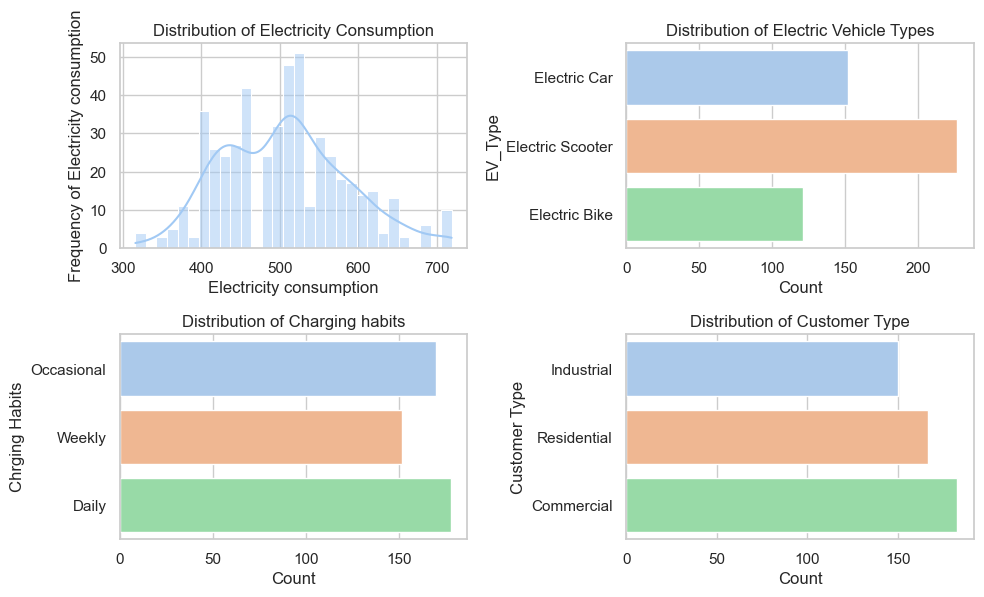

In [22]:
#set the style and color palette of the plots
sns.set(style ='whitegrid')
sns.set_palette('pastel')

#create a 2x2 subplot grid
fig, axes = plt.subplots(2,2 , figsize = (10,6))

#plot distribution of Electricity consumption
sns.histplot(data = distribution_data, x= 'Electricity_Consumption (kWh)', bins = 30, kde = True, ax=axes[0,0])
axes[0,0].set_title('Distribution of Electricity Consumption')
axes[0,0].set_xlabel('Electricity consumption')
axes[0,0].set_ylabel('Frequency of Electricity consumption')

#plot distribution of EV types
sns.countplot(data=distribution_data, y='EV_Type', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Electric Vehicle Types')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('EV_Type')

#plot distribution of Customer Type
sns.countplot(data = distribution_data, y= 'Customer_Type', ax=axes[1,1])
axes[1,1].set_title('Distribution of Customer Type')
axes[1,1].set_xlabel('Count')
axes[1,1].set_ylabel('Customer Type')

#plot distribution of charging habits
sns.countplot(data = distribution_data, y= 'Charging_Habit', ax=axes[1,0])
axes[1,0].set_title('Distribution of Charging habits')
axes[1,0].set_xlabel('Count')
axes[1,0].set_ylabel('Chrging Habits')

#Adjst layout
plt.tight_layout()

## Bivariate Analysis

In [23]:
#Extract the long and lat data from the EV dataset
distribution_data['ev_latitude'] = distribution_data['EV_Charging_Station_Location'].apply(lambda x: float(x.split(',')[0].replace('(',''.strip())))
#longitude
distribution_data['ev_longitude'] = distribution_data['EV_Charging_Station_Location'].apply(lambda x: float(x.split(',')[1].replace(')', '').strip()))


#Extract the long and lat data from the substation location
geospatial_data['sub_latitude'] = geospatial_data['Substation_Location'].apply(lambda x: float(x.split(',')[0].replace('(', '').strip()))
geospatial_data['sub_longitude'] = geospatial_data['Substation_Location'].apply(lambda x: float(x.split(',')[1].replace(')', '').strip()))



In [24]:
#drop the original location columns
distribution_data.drop(columns = 'EV_Charging_Station_Location', inplace= True)
geospatial_data.drop(columns = 'Substation_Location', inplace = True)

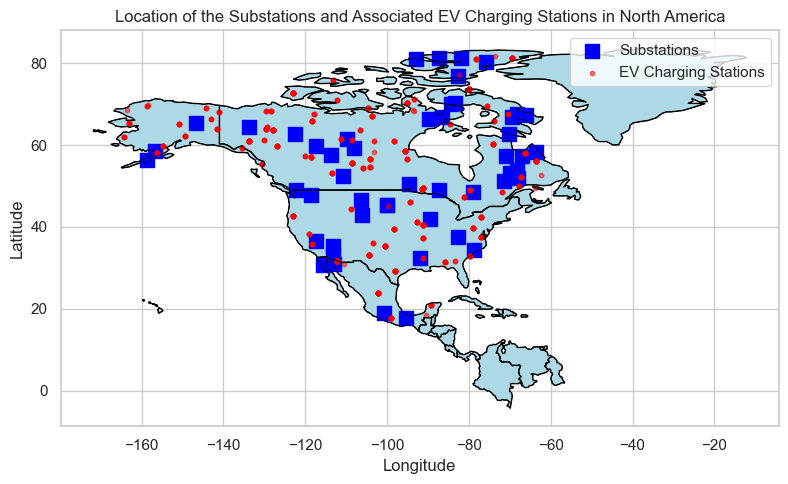

In [25]:
# Convert the dataframes to GeoDataFrames
ev_gdf = gpd.GeoDataFrame(distribution_data, geometry=gpd.points_from_xy(distribution_data.ev_longitude, distribution_data.ev_latitude))
sub_gdf = gpd.GeoDataFrame(geospatial_data, geometry=gpd.points_from_xy(geospatial_data.sub_longitude, geospatial_data.sub_latitude))

# Load the world map data
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
path_to_shapefile = r"C:\Users\Dr Afolabi\Downloads\ne_110m_admin_0_countries"
world = gpd.read_file(path_to_shapefile)

# Filter the map to North America
#north_america = world[world['continent'] == 'North America']
#Define latitude and longitude bounds for North America
lat_min, lat_max = 7, 84
lon_min, lon_max = -168, -52

# Filter the GeoDataFrame based on the bounds
north_america = world.cx[lon_min:lon_max, lat_min:lat_max]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(10, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substations on the map
sub_gdf.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substations')

# Plotting EV charging stations on the map
ev_gdf.plot(ax=ax, marker='o', markersize=10, color='red', label='EV Charging Stations', alpha=0.5)

# Set axis and title labels
plt.title('Location of the Substations and Associated EV Charging Stations in North America')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()


In [26]:
from shapely.geometry import LineString

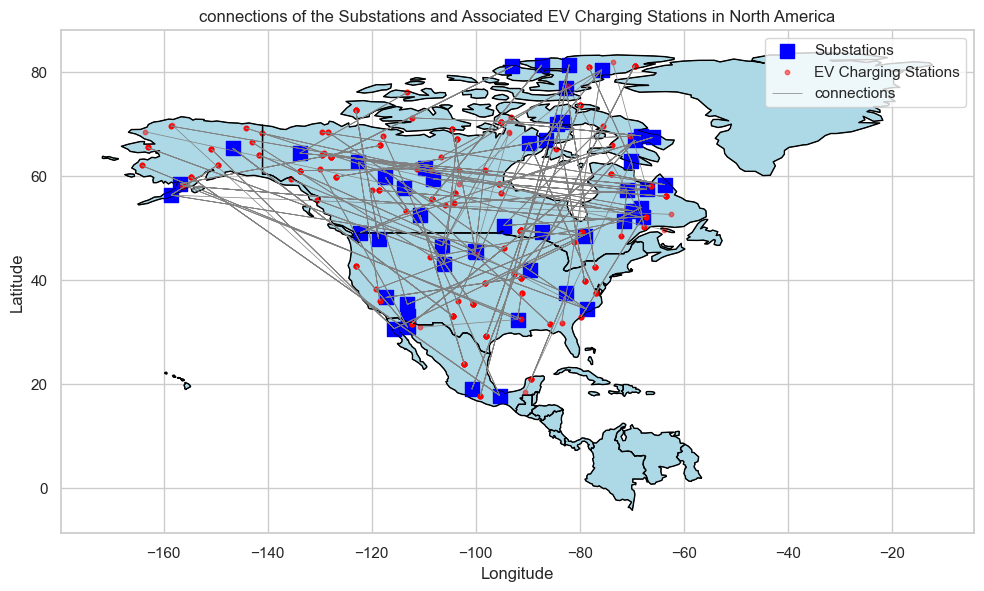

In [29]:
# Convert the dataframes to GeoDataFrames
ev_gdf = gpd.GeoDataFrame(distribution_data, geometry=gpd.points_from_xy(distribution_data.ev_longitude, distribution_data.ev_latitude))
sub_gdf = gpd.GeoDataFrame(geospatial_data, geometry=gpd.points_from_xy(geospatial_data.sub_longitude, geospatial_data.sub_latitude))

#create lines connecting each substation to it's associated ev charging station
lines = [] 
#merging the coordinates from the geospatial data with the distribution data with a common column such as the substation column
#converting the dataframe to a geodataframe to enable us plot over the map
lines = []
for _, ev_row in distribution_data.iterrows():
    substation = geospatial_data[geospatial_data['Substation_ID'] == ev_row['Substation_ID']].iloc[0]
    line = [(ev_row['ev_longitude'], ev_row['ev_latitude']),
            (substation['sub_longitude'], substation['sub_latitude'])]
    lines.append(line)
    
line_gdf = gpd.GeoDataFrame(geometry=[LineString(line) for line in lines])

# Load the world map data
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
path_to_shapefile = r"C:\Users\Dr Afolabi\Downloads\ne_110m_admin_0_countries"
world = gpd.read_file(path_to_shapefile)

# Filter the map to North America
#north_america = world[world['continent'] == 'North America']
#Define latitude and longitude bounds for North America
lat_min, lat_max = 7, 84
lon_min, lon_max = -168, -52

# Filter the GeoDataFrame based on the bounds
north_america = world.cx[lon_min:lon_max, lat_min:lat_max]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(10, 6))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substations on the map
sub_gdf.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substations')

# Plotting EV charging stations on the map
ev_gdf.plot(ax=ax, marker='o', markersize=10, color='red', label='EV Charging Stations', alpha=0.5)
line_gdf.plot(ax=ax, linewidth = 0.5, color = 'gray', label = 'connections')

# Set axis and title labels
plt.title('connections of the Substations and Associated EV Charging Stations in North America')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()


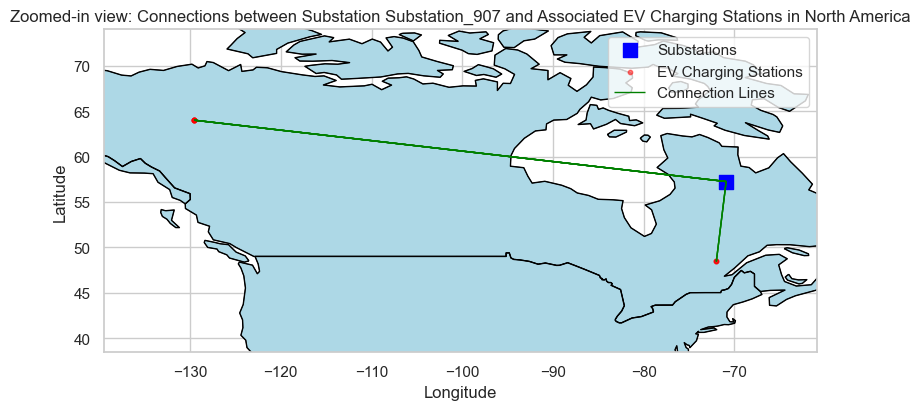

In [30]:
# Filter for the first substation
selected_sub = geospatial_data.iloc[0]
associated_ev = distribution_data[distribution_data['Substation_ID'] == selected_sub['Substation_ID']]

# Convert to GeoDataFrame
ev_selected_gdf = gpd.GeoDataFrame(associated_ev, geometry=gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude))
sub_selected_gdf = gpd.GeoDataFrame(selected_sub.to_frame().transpose(), 
                                    geometry=gpd.points_from_xy([selected_sub.sub_longitude], [selected_sub.sub_latitude]))

# Create lines connecting substation to EV charging stations
lines_selected = [(ev_row['ev_longitude'], ev_row['ev_latitude'], 
                   selected_sub['sub_longitude'], selected_sub['sub_latitude']) 
                  for _, ev_row in associated_ev.iterrows()]

line_gdf_selected = gpd.GeoDataFrame(geometry = [LineString([(line[0], line[1]), (line[2], line[3])]) for line in lines_selected])

# Load the world map data
path_to_shapefile = r"C:\Users\Dr Afolabi\Downloads\ne_110m_admin_0_countries"
world = gpd.read_file(path_to_shapefile)

# Define latitude and longitude bounds for North America
lat_min, lat_max = 7, 84
lon_min, lon_max = -168, -52

# Filter the GeoDataFrame based on the bounds
north_america = world.cx[lon_min:lon_max, lat_min:lat_max]

# Determine the boundary bounding box
buffer = 10 # degree
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(8, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Setting the zoomed-in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Plotting the substation on the map
sub_selected_gdf.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substations')

# Plotting EV charging stations on the map
ev_selected_gdf.plot(ax=ax, marker='o', markersize=10, color='red', label='EV Charging Stations', alpha=0.5)

# Plotting the connecting lines on the map
line_gdf_selected.plot(ax=ax, color='green', linewidth=1, label='Connection Lines')

# Set axis and title labels
plt.title(f'Zoomed-in view: Connections between Substation {selected_sub["Substation_ID"]} and Associated EV Charging Stations in North America')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()


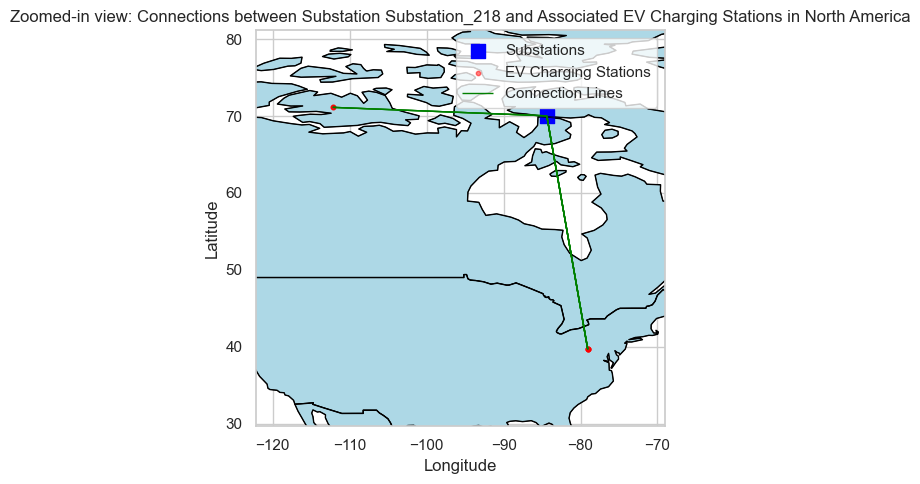

In [34]:




# Filter for the first substation
selected_sub = geospatial_data.iloc[1]
associated_ev = distribution_data[distribution_data['Substation_ID'] == selected_sub['Substation_ID']]

# Convert to GeoDataFrame
ev_selected_gdf = gpd.GeoDataFrame(associated_ev, geometry=gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude))
sub_selected_gdf = gpd.GeoDataFrame(selected_sub.to_frame().transpose(), 
                                    geometry=gpd.points_from_xy([selected_sub.sub_longitude], [selected_sub.sub_latitude]))

# Create lines connecting substation to EV charging stations
lines_selected = [(ev_row['ev_longitude'], ev_row['ev_latitude'], 
                   selected_sub['sub_longitude'], selected_sub['sub_latitude']) 
                  for _, ev_row in associated_ev.iterrows()]

line_gdf_selected = gpd.GeoDataFrame(geometry = [LineString([(line[0], line[1]), (line[2], line[3])]) for line in lines_selected])

# Load the world map data
path_to_shapefile = r"C:\Users\Dr Afolabi\Downloads\ne_110m_admin_0_countries"
world = gpd.read_file(path_to_shapefile)

# Define latitude and longitude bounds for North America
lat_min, lat_max = 7, 84
lon_min, lon_max = -168, -52

# Filter the GeoDataFrame based on the bounds
north_america = world.cx[lon_min:lon_max, lat_min:lat_max]

# Determine the boundary bounding box
buffer = 10 # degree
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(8, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Setting the zoomed-in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Plotting the substation on the map
sub_selected_gdf.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substations')

# Plotting EV charging stations on the map
ev_selected_gdf.plot(ax=ax, marker='o', markersize=10, color='red', label='EV Charging Stations', alpha=0.5)

# Plotting the connecting lines on the map
line_gdf_selected.plot(ax=ax, color='green', linewidth=1, label='Connection Lines')

# Set axis and title labels
plt.title(f'Zoomed-in view: Connections between Substation {selected_sub["Substation_ID"]} and Associated EV Charging Stations in North America')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()

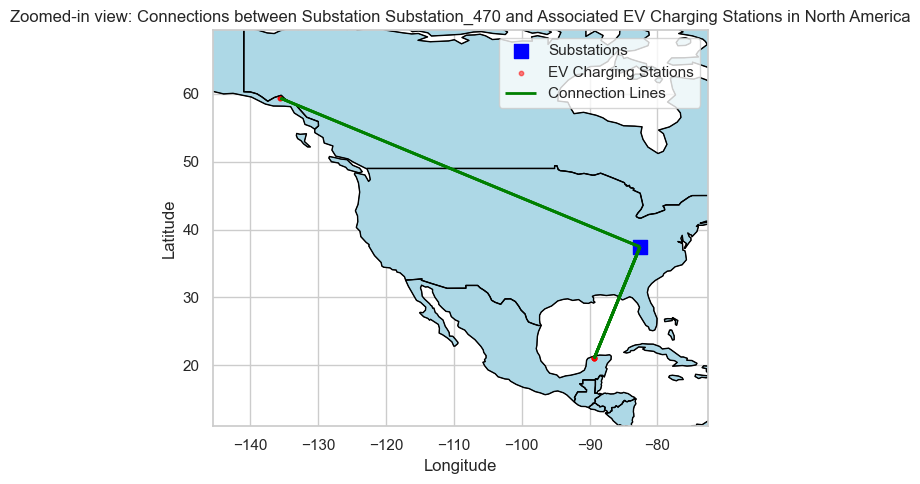

In [32]:
# Filter for the first substation
selected_sub = geospatial_data.iloc[49]
associated_ev = distribution_data[distribution_data['Substation_ID'] == selected_sub['Substation_ID']]

# Convert to GeoDataFrame
ev_selected_gdf = gpd.GeoDataFrame(associated_ev, geometry=gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude))
sub_selected_gdf = gpd.GeoDataFrame(selected_sub.to_frame().transpose(), 
                                    geometry=gpd.points_from_xy([selected_sub.sub_longitude], [selected_sub.sub_latitude]))

# Create lines connecting substation to EV charging stations
lines_selected = [(ev_row['ev_longitude'], ev_row['ev_latitude'], 
                   selected_sub['sub_longitude'], selected_sub['sub_latitude']) 
                  for _, ev_row in associated_ev.iterrows()]

line_gdf_selected = gpd.GeoDataFrame(geometry = [LineString([(line[0], line[1]), (line[2], line[3])]) for line in lines_selected])

# Load the world map data
path_to_shapefile = r"C:\Users\Dr Afolabi\Downloads\ne_110m_admin_0_countries"
world = gpd.read_file(path_to_shapefile)

# Define latitude and longitude bounds for North America
lat_min, lat_max = 7, 84
lon_min, lon_max = -168, -52

# Filter the GeoDataFrame based on the bounds
north_america = world.cx[lon_min:lon_max, lat_min:lat_max]

# Determine the boundary bounding box
buffer = 10 # degree
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(8, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Setting the zoomed-in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Plotting the substation on the map
sub_selected_gdf.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substations')

# Plotting EV charging stations on the map
ev_selected_gdf.plot(ax=ax, marker='o', markersize=10, color='red', label='EV Charging Stations', alpha=0.5)

# Plotting the connecting lines on the map
line_gdf_selected.plot(ax=ax, color='green', linewidth=2, label='Connection Lines')

# Set axis and title labels
plt.title(f'Zoomed-in view: Connections between Substation {selected_sub["Substation_ID"]} and Associated EV Charging Stations in North America')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Dr Afolabi\AppData\Local\Temp\ipykernel_16108\4279579542.py:30: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  new_gdf.plot(ax=ax, markersize=new_gdf['count'] * 20, color=color, label=ev_type, alpha=0.7)


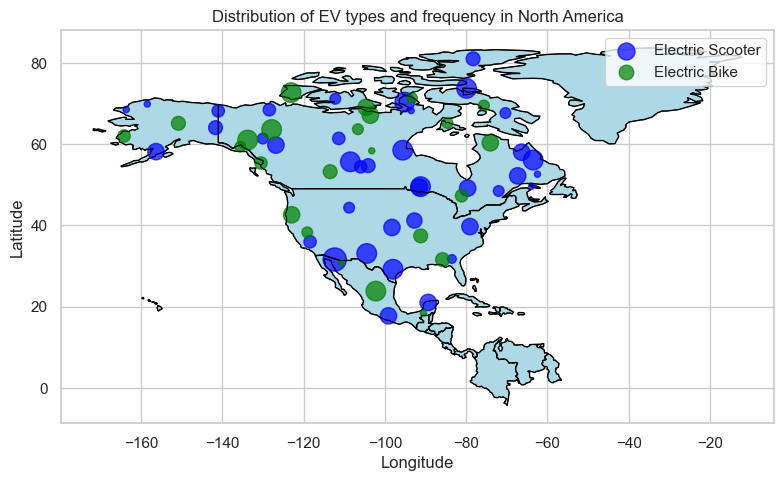

In [40]:
# Group by location and count the number of stations
grouped_data = distribution_data.groupby(['ev_latitude', 'ev_longitude', 'EV_Type']).size().reset_index(name='count')

# Convert grouped data to GeoDataFrame
grouped_df = gpd.GeoDataFrame(grouped_data, geometry=gpd.points_from_xy(grouped_data.ev_longitude, 
                                                                        grouped_data.ev_latitude))

# Load the world map data and filter for North America
path_to_shapefile = r"C:\Users\Dr Afolabi\Downloads\ne_110m_admin_0_countries"
world = gpd.read_file(path_to_shapefile)

# Define latitude and longitude bounds for North America
lat_min, lat_max = 7, 84
lon_min, lon_max = -168, -52

# Filter the GeoDataFrame based on the bounds
north_america = world.cx[lon_min:lon_max, lat_min:lat_max]

# Plotting with zoom
fig, ax = plt.subplots(figsize=(8, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Define the colors of EV types
colors = {'Electric car': 'yellow', 'Electric Scooter': 'blue', 'Electric Bike': 'green'}

# Plotting EV type
for ev_type, color in colors.items():
    new_gdf = grouped_df[grouped_df['EV_Type'] == ev_type]
    new_gdf.plot(ax=ax, markersize=new_gdf['count'] * 20, color=color, label=ev_type, alpha=0.7)

# Set axis and title labels
plt.title('Distribution of EV types and frequency in North America')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()


## Network Capacity Assessment
To perform network capacity assessment:
1. Calculate the total electricity consumption for each substation
2. Compare the total electricity consumption with the transmission line capacity

In [24]:
#group the ev distribution data by substation and calculate the total electricity consumption for each substation
consumption_by_substation = distribution_data.groupby('Substation_ID')['Electricity_Consumption (kWh)'].sum().reset_index()

#merging the total consumption data  with geospatial data
network_capacity_data = pd.merge(geospatial_data, consumption_by_substation, on='Substation_ID')

#renaming columns for better understanding
network_capacity_data.rename(columns = {'Electricity_Consumption (kWh)': 'Total_consumption(kwh)'},inplace = True)

#calculating the ratio of total consumption to transmission line capacity
#conversion: 1MW = 1000KWh
network_capacity_data['consumption_to_capacity_ratio'] = network_capacity_data['Total_consumption(kwh)'] / (network_capacity_data['Transmission_Line_Capacity (MW)'] * 1000)
network_capacity_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),sub_latitude,sub_longitude,Total_consumption(kwh),consumption_to_capacity_ratio
0,Substation_907,40,57.258136,-70.905820,6663.768920,0.166594
1,Substation_218,71,70.025385,-84.380572,5997.437051,0.084471
2,Substation_339,85,80.393235,-75.797841,4536.778685,0.053374
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
4,Substation_349,40,66.798871,-86.511241,4901.836555,0.122546


In [26]:
from shapely.geometry import Point

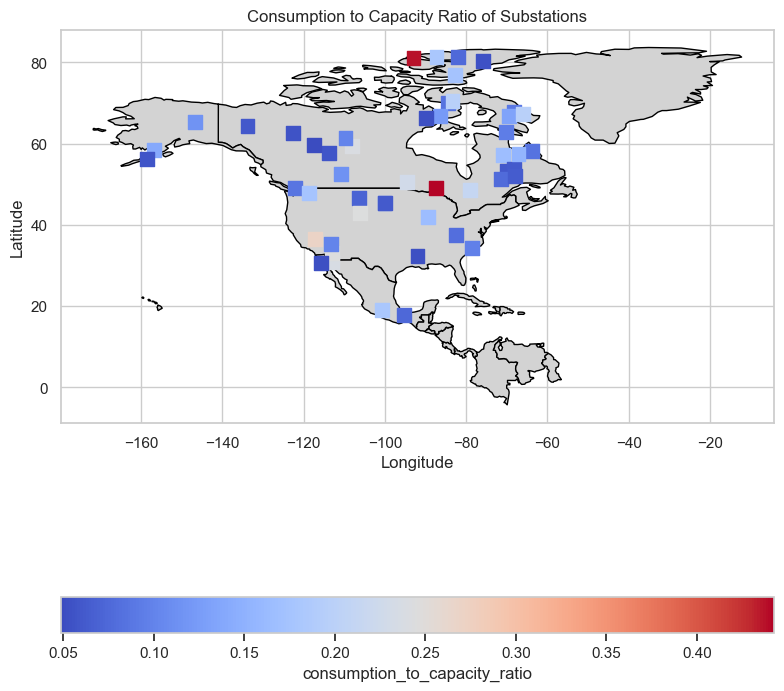

In [31]:
# Creating the GeoDataFrame for network capacity
geometry_network_capacity = [Point(lon, lat) for lon, lat in zip(network_capacity_data['sub_longitude'], network_capacity_data['sub_latitude'])]
gdf_network_capacity = gpd.GeoDataFrame(network_capacity_data, geometry=geometry_network_capacity)

# Plotting in choroplet style
fig, ax = plt.subplots(figsize=(8, 12))
north_america.plot(ax=ax, color='lightgray', edgecolor='black')
gdf_network_capacity.plot(
    column='consumption_to_capacity_ratio', 
    cmap='coolwarm', 
    legend=True, 
    marker='s', 
    markersize=100, 
    ax=ax, 
    legend_kwds={'label': 'consumption_to_capacity_ratio', 'orientation': 'horizontal'}
)
ax.set_title('Consumption to Capacity Ratio of Substations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.tight_layout()


In [38]:
#identifying if the No of EVs that frequent the substations have a correlation with their increased capacity consumption
#group by the substation IDs with the no of Evs
ev_count = distribution_data.groupby('Substation_ID')['Number_of_EVs'].sum().reset_index()

#merge with network capacity data
final_data = pd.merge(ev_count,network_capacity_data, on = 'Substation_ID')

#correlation
correlation_ratio = final_data['Number_of_EVs'].corr(final_data['consumption_to_capacity_ratio'])

In [40]:
correlation_ratio

-0.10944923035990646

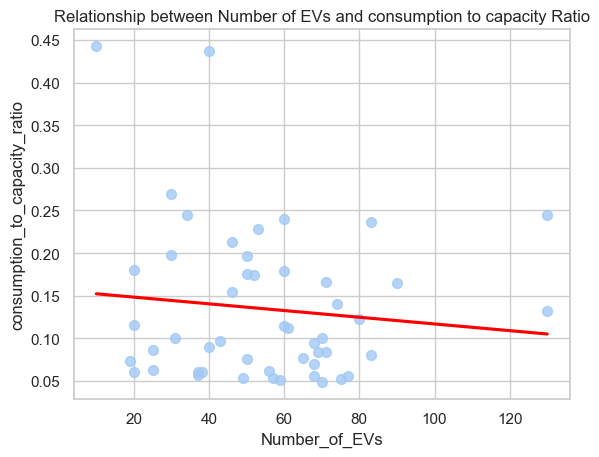

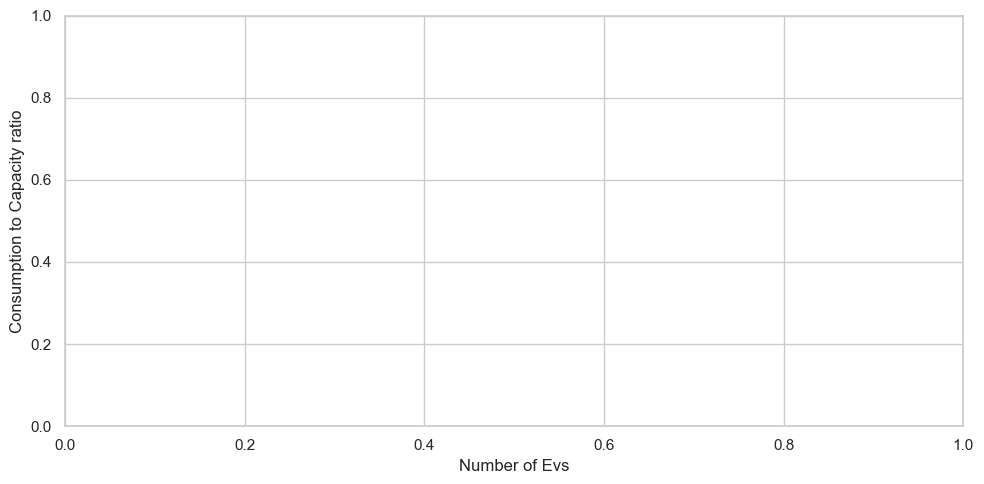

In [43]:
#scatterplot with regression line
sns.regplot(x= 'Number_of_EVs', y='consumption_to_capacity_ratio', data=final_data, scatter_kws={'s':50}, line_kws = {'color':'red'}, ci=None)
plt.title('Relationship between Number of EVs and consumption to capacity Ratio')
plt.figure(figsize = (10,5))
plt.xlabel('Number of Evs')
plt.ylabel('Consumption to Capacity ratio')
plt.grid(True)
plt.tight_layout()

## Identifying Bottlenecks
By analyzing the maps, we can identify substations and areas that are potential bottlenecks in the distribution network. These are the areas where the consumption to capacity ratio is high


In [44]:
#filtering capacity to consumption ratio greater than 1
bottleneck_sub = network_capacity_data[network_capacity_data['consumption_to_capacity_ratio']  >= 0.9]

#displaying bottleneck substations
bottleneck_sub

,Substation_ID,Transmission_Line_Capacity (MW),sub_latitude,sub_longitude,Total_consumption(kwh),consumption_to_capacity_ratio


## Optimizing Network Upgrades
For optimizing network upgrades, substations with potentials to have high comsumption to capacity ratio will be focused on.
Ugrading the transmission lines or adding additional capacity in these areas can manage the potential to have increased load effectively and ensuring grid reliability. 

Additionally, it is important to note from the analysis that the geographical distribution of the EV stations; where EV charging stations are quite far from the substations.

The business can also look into:
1. Potential future growth in EV adoption in different areas
2. Costs associated with different upgrade options

In [45]:
top_5_substations = network_capacity_data.nlargest(5, 'consumption_to_capacity_ratio')
top_5_substations

,Substation_ID,Transmission_Line_Capacity (MW),sub_latitude,sub_longitude,Total_consumption(kwh),consumption_to_capacity_ratio
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
14,Substation_87,12,81.031814,-92.941747,5243.800714,0.436983
27,Substation_711,17,36.618181,-117.277556,4579.354677,0.269374
20,Substation_11,43,33.082269,-113.118931,10534.827701,0.244996
42,Substation_258,22,42.952789,-106.049333,5378.214378,0.244464


## Correllation with Weather Data
Analyzing the correlation between weather data and electric consumption can provide insights as to how weather affect the ditribution network

In [42]:
#merge weather data and distribution data
merged_df= pd.merge(distribution_data, weather_data, on=['Timestamp','Substation_ID'])

#calculate the correation between weather condition and electricity onsumption
correlation_matrix= merged_df[['Electricity_Consumption (kWh)', 'Temperature (°C)','Precipitation (mm)']].corr()
correlation_matrix

,Electricity_Consumption (kWh),Temperature (°C),Precipitation (mm)
Electricity_Consumption (kWh),1.000000,0.131543,0.085014
Temperature (°C),0.131543,1.000000,-0.005828
Precipitation (mm),0.085014,-0.005828,1.000000


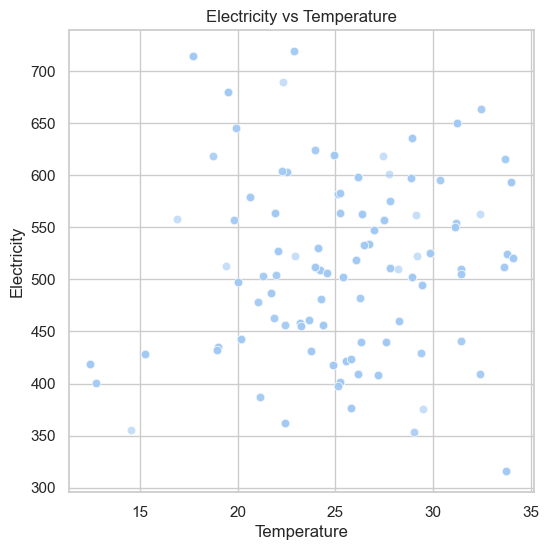

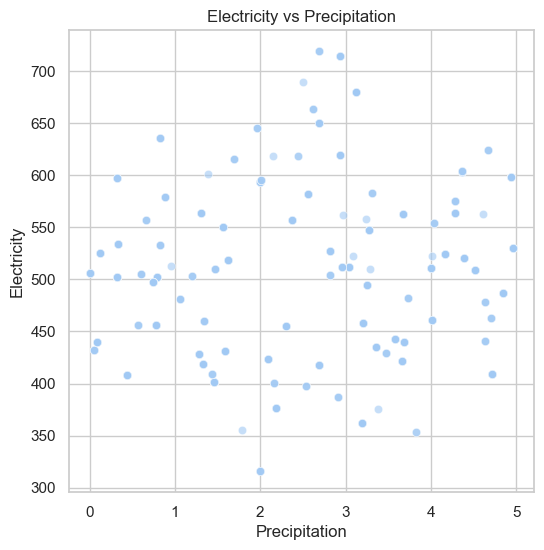

In [46]:
#electricity consumption vs temp
plt.figure(figsize= (6,6))
sns.scatterplot(data=merged_df, x='Temperature (°C)', y='Electricity_Consumption (kWh)', alpha = 0.6)
plt.title('Electricity vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Electricity')

#electricity vs Precipitation
plt.figure(figsize= (6,6))
sns.scatterplot(data=merged_df, x='Precipitation (mm)', y='Electricity_Consumption (kWh)', alpha = 0.6)
plt.title('Electricity vs Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Electricity');

## Insights
1. Electricity Consumption: The electricity consumption is mostly centered around 500kwh with certain instances of increased consumption. This indicaes varied demands at different times and locations.

2. EV types and Charging Habits: Electric scooters are the most common types of EVs. Most customers charge their EVs daily, indicating a consistent daily load on he distribution network.

3. Consumer Type: Most customers are commercial customers.

4. Geospatial Distribution: The spatial distribution of substions and EV charging station is wide spread, however the charging stations are far from it's corresponding substations.

5. Network Capacity: Some substations have a high consumption to capacity ratio indicating potential bottlenecks and overload in the network. There is no correlation with the Number of Evs per substation and the consumption to capacity ratio indicating that number of EVs is not a factor for overload.

6. Weather Correlation: The correlation between weather conditions(temperature, precipitation) and electric consumption is quite weak suggesting that other factors might be more influential in affecting electric consumption.



## Recommendations / Optimization Strategy

### Based on the analysis done and business problem at hand, The following recommendations can be incorporated into the business;

1. Prioritize Substation Upgrades: Prioritize upgrades at substations where the consumption to capacity ratio is high indicating potential overloads. Upgrade the transmission lines because the distance between the EV chargin stations and the substations are too far.

2. Geospatial analysis for upgrade planning: Use geospatial analysis to determine the optimal locations for new substations or upgrades to existing ones. Consider factors like proximity to high load in demand areas i.e area with high consumption ratio and geographical constraints.

3. Demand side management: Implement demand side management strategies to balance the load on the grid. Customers should be encouraged to to charge their EVS during off peak hour through incentives and dynamic pricing.

4. Advanced Monitoring and analytics: Deploy advanced monitoring systems to continously monitor the health and performance of the distribution network. Use analytics to predict potential issues and take preventive action.

5. Cost benefit analysis: Conduct a comprehensive cost benefit analysis for different upgrade options. Consider factors like cost of upgrades, operational costs, potential revenues from increased capacity and the impact on service reliability on customer satisfaction.

6. Customer Engagement: Engage with customers to understand their needs and expectations. Provide clear communication about network upgrades and how they will enhance service reliability and meet the growing demand for EV charging.

7. Continous improvement: Continuous monitoring and assesing the performance of the distribution network.

By following these steps, Power Charge Utilities can develop an effective optimizaion strategy to manage the increased load demand from EV charging stations, ensure the reliability and resilience of distribution networks and meet the expectations of customers all while optimizing costs and ensuring regulatory compliance.


In [46]:
weather_data

,Timestamp,Temperature (°C),Precipitation (mm),Weather_Conditions,Substation_ID
0,2020-01-03 11:00:00,28.865989,0.313611,Snowy,Substation_744
1,2020-01-03 17:00:00,28.902260,0.817728,Clear,Substation_516
2,2020-01-04 04:00:00,24.212651,4.516506,Clear,Substation_261
3,2020-01-04 23:00:00,29.024606,3.821278,Snowy,Substation_560
4,2020-01-05 00:00:00,24.126655,4.965771,Snowy,Substation_258
...,...,...,...,...,...
92,2020-02-10 10:00:00,19.379869,0.957467,Clear,Substation_562
93,2020-02-10 13:00:00,19.001256,3.359719,Clear,Substation_562
94,2020-02-10 14:00:00,23.231818,2.297417,Clear,Substation_74
95,2020-02-11 02:00:00,31.228543,2.688862,Rainy,Substation_365


In [41]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Substation_ID                    50 non-null     object 
 1   Number_of_EVs                    50 non-null     int64  
 2   Transmission_Line_Capacity (MW)  50 non-null     int64  
 3   sub_latitude                     50 non-null     float64
 4   sub_longitude                    50 non-null     float64
 5   Total_consumption(kwh)           50 non-null     float64
 6   consumption_to_capacity_ratio    50 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 3.1+ KB


In [33]:
network_capacity_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),sub_latitude,sub_longitude,Total_consumption(kwh),consumption_to_capacity_ratio
0,Substation_907,40,57.258136,-70.905820,6663.768920,0.166594
1,Substation_218,71,70.025385,-84.380572,5997.437051,0.084471
2,Substation_339,85,80.393235,-75.797841,4536.778685,0.053374
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
4,Substation_349,40,66.798871,-86.511241,4901.836555,0.122546


In [32]:
distribution_data

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID,ev_latitude,ev_longitude
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
1,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
3,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
...,...,...,...,...,...,...,...,...,...,...,...
495,2020-01-15 12:00:00,Urban,Residential,428.155578,Type 2,Electric Scooter,Occasional,8,Substation_470,21.013013,-89.330010
496,2020-01-15 12:00:00,Urban,Residential,428.155578,Type 2,Electric Scooter,Occasional,8,Substation_470,21.013013,-89.330010
497,2020-02-04 21:00:00,Urban,Residential,400.164596,DC Fast,Electric Bike,Weekly,9,Substation_470,59.359458,-135.575616
498,2020-01-15 12:00:00,Urban,Residential,428.155578,Type 2,Electric Scooter,Occasional,8,Substation_470,21.013013,-89.330010


In [24]:
distribution_data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID,ev_latitude,ev_longitude
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
1,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
3,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964


In [51]:
geospatial_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),sub_latitude,sub_longitude
0,Substation_907,40,57.258136,-70.905820
1,Substation_218,71,70.025385,-84.380572
2,Substation_339,85,80.393235,-75.797841
3,Substation_773,10,49.123078,-87.359890
4,Substation_349,40,66.798871,-86.511241
